In [221]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
df = pd.read_csv('UNdata_Export.csv')
df.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Algeria,Electricity - total solar production,2016.0,"Kilowatt-hours, million",87.0,1.0
1,Algeria,Electricity - total solar production,2015.0,"Kilowatt-hours, million",58.0,NaN
2,American Samoa,Electricity - total solar production,2015.0,"Kilowatt-hours, million",1.5,NaN
3,American Samoa,Electricity - total solar production,2014.0,"Kilowatt-hours, million",1.1,1.0
4,American Samoa,Electricity - total solar production,2013.0,"Kilowatt-hours, million",1.1,1.0


In [223]:
CountryIndicatorAustralia = df['Country or Area'].str.match('Australia')
CountryIndicatorSwitzerland = df['Country or Area'].str.contains('Switzerland' , case = False)
CountryIndicatorJapan = df['Country or Area'].str.contains('japan' , case = False)
CountryIndicatorCanada = df['Country or Area'].str.contains('canada' , case = False)

QuantityIndicator = df['Quantity']

AustraliaElectricity = df[CountryIndicatorAustralia & QuantityIndicator]
SwitzerlandElectricity = df[CountryIndicatorSwitzerland & QuantityIndicator]
JapanElectricity = df[CountryIndicatorJapan & QuantityIndicator]
CanadaElectricity = df[CountryIndicatorCanada & QuantityIndicator]

Australiayear = AustraliaElectricity['Year']
AustraliaQuantity = AustraliaElectricity['Quantity']

Switzerlandyear = SwitzerlandElectricity['Year']
SwitzerlandQuantity = SwitzerlandElectricity['Quantity']

Japanyear = JapanElectricity['Year']
JapanQuantity = JapanElectricity['Quantity']

Canadayear = CanadaElectricity['Year']
CanadaQuantity = CanadaElectricity['Quantity']

#x = AustraliaElectricity['Year'].tolist()
#x
#CanadaElectricity.head(24)
QuantityIndicator.head()

0    87.0
1    58.0
2     1.5
3     1.1
4     1.1
Name: Quantity, dtype: float64

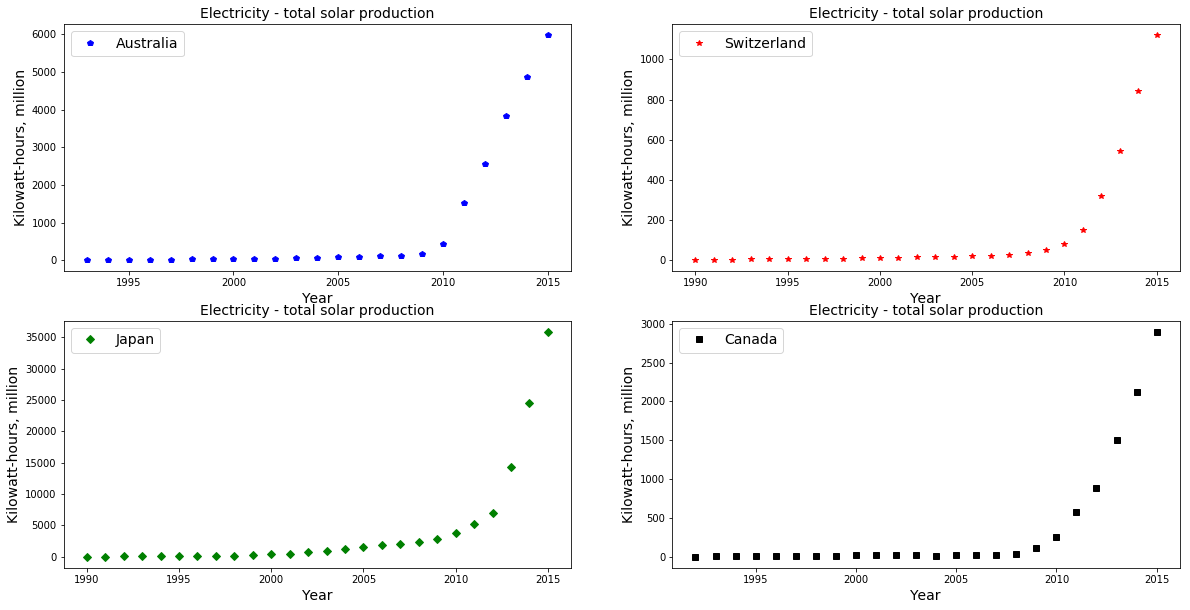

In [224]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(Australiayear, AustraliaQuantity, 'p', color = 'b', label='Australia')
plt.legend(fontsize=14)
plt.title('Electricity - total solar production', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Kilowatt-hours, million', fontsize=14)

plt.subplot(2,2,2)
plt.plot(Switzerlandyear, SwitzerlandQuantity, '*', label='Switzerland', color = 'r')
plt.legend(fontsize=14)
plt.title('Electricity - total solar production', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Kilowatt-hours, million', fontsize=14)

plt.subplot(2,2,3)
plt.plot(Japanyear, JapanQuantity, 'D', label='Japan', color = 'g')
plt.legend(fontsize=14)
plt.title('Electricity - total solar production', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Kilowatt-hours, million', fontsize=14)

plt.subplot(2,2,4)
plt.plot(Canadayear, CanadaQuantity, 's', label='Canada', color = 'black')
plt.title('Electricity - total solar production', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Kilowatt-hours, million', fontsize=14)
plt.legend(fontsize=14)

plt.show()



Here I am comparing electricity produce by four differnet countries over a cource of time in million kilowatt-hours. Around 2010 all the countries's production exponentially increased and continue to do so. Due to the presentation of the plots, if we don't pay too close attention to the y-axis, it appears from the plot all the countries are produceing similer amounts of electricity.

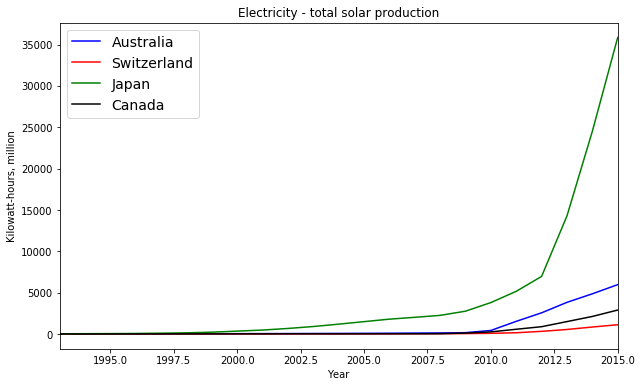

In [225]:
plt.figure(figsize=(10,6))

plt.plot(Australiayear, AustraliaQuantity, color = 'b', label='Australia')
plt.plot(Switzerlandyear, SwitzerlandQuantity, label='Switzerland', color = 'r')
plt.plot(Japanyear, JapanQuantity, label='Japan', color = 'g')
plt.plot(Canadayear, CanadaQuantity, label='Canada', color = 'black')

plt.xlim([1993, 2015])
plt.title('Electricity - total solar production')
plt.xlabel('Year')
plt.ylabel('Kilowatt-hours, million')
plt.legend(fontsize=14)
plt.show()

Here are the same plots above. Ploted with line as line graph, without linestyle, puts the electricity production into prospective. Other developed countries are not producing anywhere near Japan after around 2007.

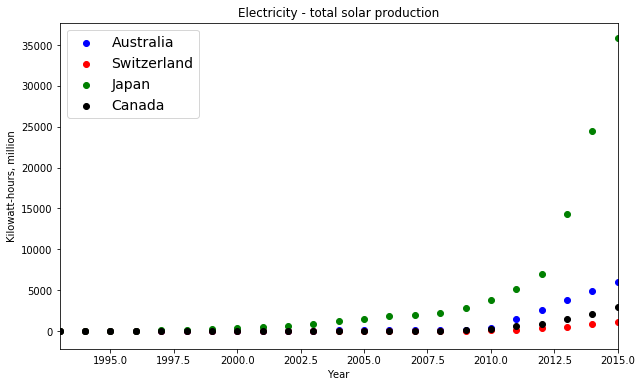

In [226]:
plt.figure(figsize=(10,6))

plt.scatter(Australiayear, AustraliaQuantity, color = 'b', label='Australia')
plt.scatter(Switzerlandyear, SwitzerlandQuantity, label='Switzerland', color = 'r')
plt.scatter(Japanyear, JapanQuantity, label='Japan', color = 'g')
plt.scatter(Canadayear, CanadaQuantity, label='Canada', color = 'black')

plt.xlim([1993, 2015])
plt.title('Electricity - total solar production')
plt.xlabel('Year')
plt.ylabel('Kilowatt-hours, million')
plt.legend(loc=2, fontsize=14)
plt.show()

Here again same plot in scatter plot, without linestyle. It is little unclear compare to the line graph, the dots seem to overlap a little, and I had to use loc attribut of the legend() method to move the legend to the left to keep it from obsuring the plot.

In [263]:
#Allyear = df.loc[lambda df: df['Year'] == 2015]

Australiayear2015 = AustraliaElectricity[AustraliaElectricity['Year'] == 2015]

Switzerlandyear2015 = SwitzerlandElectricity[SwitzerlandElectricity['Year'] == 2015]

Japanyear2015 = JapanElectricity[JapanElectricity['Year'] == 2015]

Canadayear2015 = CanadaElectricity[CanadaElectricity['Year'] == 2015]

new_array = [int(Australiayear2015['Quantity']), int(Switzerlandyear2015['Quantity']), int(Japanyear2015['Quantity']), int(Canadayear2015['Quantity'])]

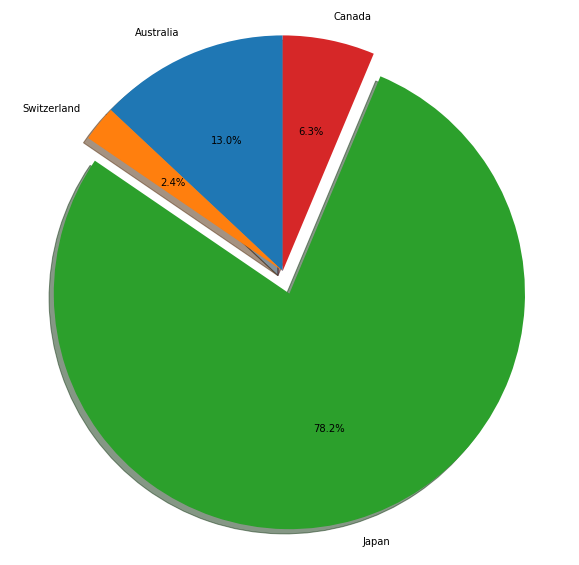

In [278]:
labels = 'Australia', 'Switzerland', 'Japan', 'Canada'
explode = (0, 0, 0.1, 0)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(new_array, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()


This pie chart shows how much of solar electricity was produced by each of the four countries, and clearly shows. This is the lates data and Japan is far ahead of other three country.